In [1]:
import graphlab as gl
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

# DBScan with Double-Moons Data.

In [2]:
X, label = make_moons(n_samples=200, noise=0.1, random_state=19)
print(X[:5,])

[[ 0.28171457  0.91044406]
 [ 0.8389241  -0.53005338]
 [ 0.40915474  0.80944352]
 [-0.98415213  0.13142155]
 [ 1.15919021  0.4910425 ]]


## Modelling.

In [3]:
sf = gl.SFrame(X)
sf = sf.unpack('X1')
model = gl.dbscan.create(sf,radius=0.25, min_core_neighbors=10)

This non-commercial license of GraphLab Create for academic use is assigned to yogitricahyono@gmail.com and will expire on June 27, 2021.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\yogit\AppData\Local\Temp\graphlab_server_1593242467.log.0


Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 8190

number of reference data blocks: 8

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 4375    | 19.4444     | 0us          |

[INFO] graphlab.toolkits.clustering.dbscan: Identifying noise points and core points.


| 22500   | 100         | 0us          |

+---------+-------------+--------------+

[INFO] graphlab.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+-----------------------------+

| Number of components merged |

+-----------------------------+

| 1063                        |

| 0                           |

+-----------------------------+

[INFO] graphlab.toolkits.clustering.dbscan: Processing boundary points.


In [4]:
model.summary()

Class                                    : DBSCANModel

Schema
------
Number of examples                       : 200
Number of feature columns                : 2
Max distance to a neighbor (radius)      : 0.25
Min number of neighbors for core points  : 10
Number of distance components            : 1

Training summary
----------------
Total training time (seconds)            : 3.858
Number of clusters                       : 2

Accessible fields
-----------------
cluster_id                              : Cluster label for each row in the input dataset.


In [5]:
model['cluster_id']

row_id,cluster_id,type
175,0,core
110,0,core
96,0,core
92,0,core
115,1,core
73,1,core
155,1,core
136,1,core
5,0,core
7,0,core


## Plot by instance type

In [6]:
sf_out = sf.add_row_number('row_id')
sf_out = sf_out.join(model['cluster_id'], on='row_id', how='left')

In [7]:
type_map = {k: v for v, k in enumerate(sf_out['type'].unique())}
sf_out['type_code'] = sf_out['type'].apply(lambda x: type_map[x])

C:\Users\yogit\Anaconda2\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


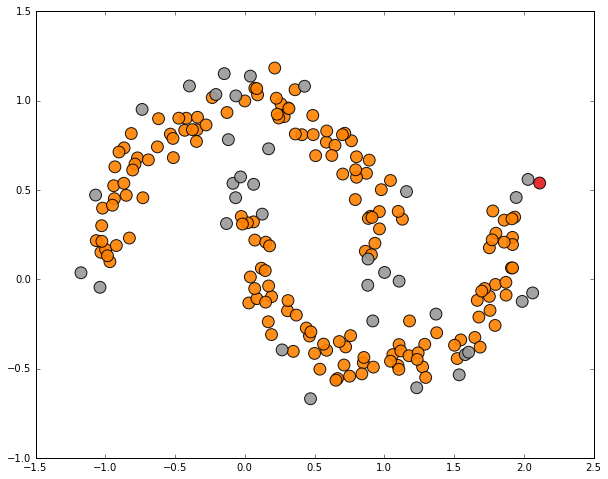

In [8]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(sf_out['X1.0'], sf_out['X1.1'], c=sf_out['type_code'],
          s = 140, alpha=0.9, cmap=plt.cm.Set1)
fig.show()

In [ ]:
model['cluster_id'].show()

In [9]:
sf_out

row_id,X1.0,X1.1,cluster_id,type,type_code
175,-0.931366638307,0.629593906587,0,core,1
110,-0.512525986991,0.681034014781,0,core,1
96,0.360087431684,1.06137585307,0,core,1
92,-0.000194960525427,0.998399325629,0,core,1
115,1.75317377592,-0.0961061336774,1,core,1
73,0.0717386403349,0.219313655652,1,core,1
155,0.305950835218,-0.176371745067,1,core,1
136,0.118514445974,0.0617020285605,1,core,1
5,-0.967034863976,0.0981273018491,0,core,1
7,0.978275080963,0.501470014515,0,core,1


---

# Level Set Tree with Two Moons

In [10]:
from sklearn.datasets import make_moons
#syntactic brevity
import debacl as dcl

import matplotlib.pyplot as plt
plt.style.use('grayscale')
%matplotlib notebook

K = connectivity parameter: Epsilon in DBScan.
prune_threshold: if leave has fewer than 10 points just merge it with its siblings. it makes tree little smoother

In [11]:
tree = dcl.construct_tree(X, k=20, prune_threshold=10, verbose=True)
print(tree)

+----+-------------+-----------+------------+----------+------+--------+----------+
| id | start_level | end_level | start_mass | end_mass | size | parent | children |
+----+-------------+-----------+------------+----------+------+--------+----------+
| 0  |    0.000    |   0.185   |   0.000    |  0.195   | 200  |  None  |  [1, 2]  |
| 1  |    0.185    |   0.411   |   0.195    |  1.000   |  82  |   0    |    []    |
| 2  |    0.185    |   0.366   |   0.195    |  0.945   |  79  |   0    |    []    |
+----+-------------+-----------+------------+----------+------+--------+----------+


<IPython.core.display.Javascript object>


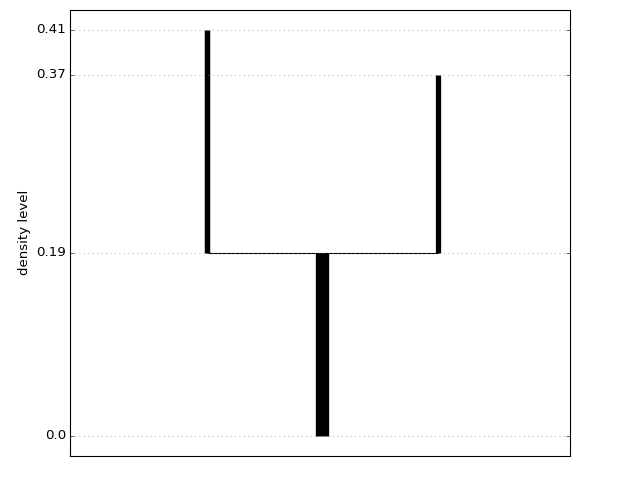

In [12]:
fig = tree.plot(form='density')[0]
fig.show()

## Retriving the clusters

In [13]:
labels = tree.get_clusters(method='leaf',
                          fill_background=False)
labels[:5]

array([[  0,   1],
       [129,   1],
       [  2,   1],
       [ 22,   1],
       [  7,   1]])